In [155]:
#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [156]:
#importing dataset
df = pd.read_csv('C:\\Users\\deepz\\Downloads\\CarPrice.csv')

In [157]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#### We're using data about cars to teach a computer to predict how much a car costs based on its features like safety, engine type, and fuel.

## <span style='color:red'>Data Exploration

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [159]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [160]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [161]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [162]:
categorical_columns=df.select_dtypes(include=['object'])
categorical_columns

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [163]:
for column in categorical_columns:
    unique_values=df[column].unique()
    print(f"\nUnique Values for {column}:")
    print(unique_values)


Unique Values for CarName:
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick

In [164]:
#splitting company name from carName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)

In [165]:
df

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [166]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### The Company Names of the Cars are not spelled  right.

In [167]:
corrections = {
    'maxda':'mazda',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
}
df['CompanyName'] = df['CompanyName'].replace(corrections)
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [168]:
df.duplicated().sum()

0

#### No Duplicates

In [169]:
len(df['car_ID'])

205

In [170]:
#car_id is not needed so we can drop that column
df.drop(['car_ID'],axis=1,inplace = True)

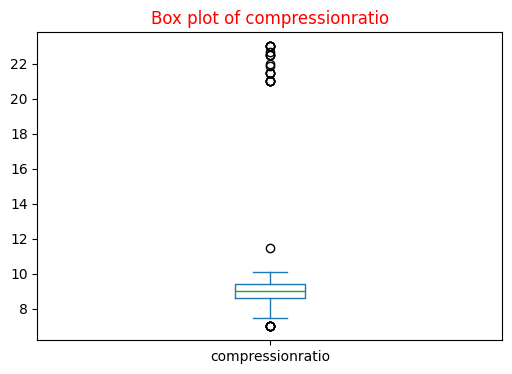

In [171]:
plt.figure(figsize = (6,4))
df['compressionratio'].plot(kind = 'box')
plt.title('Box plot of compressionratio',color = 'red')
plt.show()

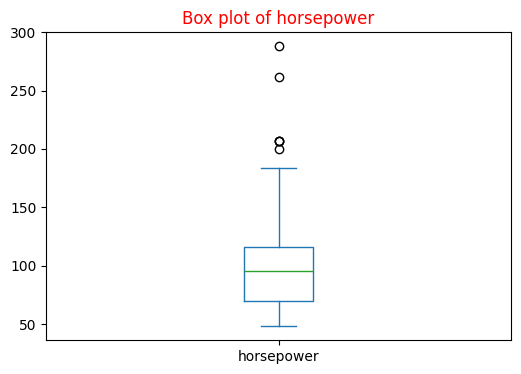

In [172]:
plt.figure(figsize = (6,4))
df['horsepower'].plot(kind = 'box')
plt.title('Box plot of horsepower',color = 'red')
plt.show()

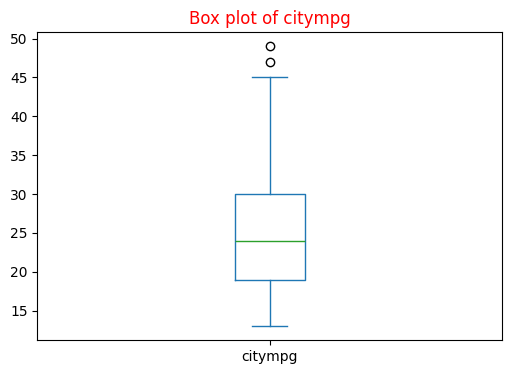

In [173]:
plt.figure(figsize = (6,4))
df['citympg'].plot(kind = 'box')
plt.title('Box plot of citympg',color = 'red')
plt.show()

#### Potential outliers present in compressionratio and horsepower. 

In [174]:
#Distribution of numerical variables
numerical_column = df.select_dtypes(include=['float','int']).columns
numerical_column

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

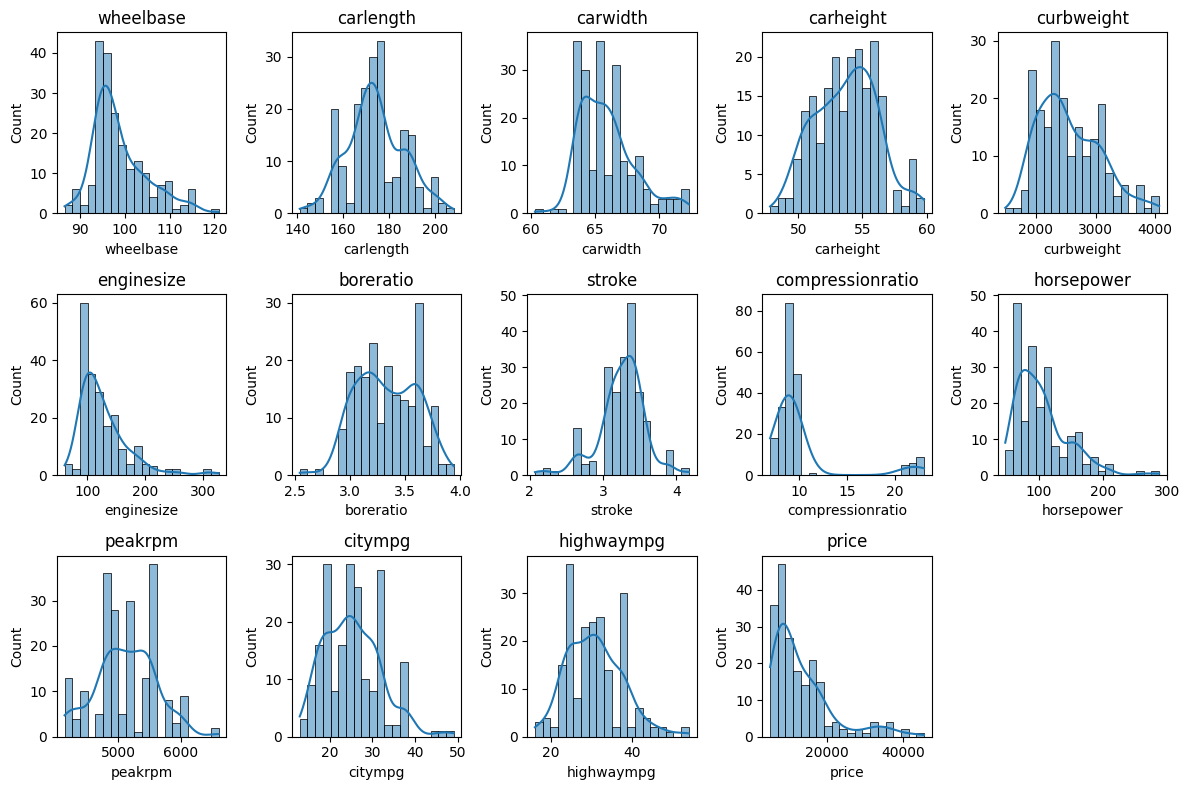

In [175]:

numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12,8))
for feature in numerical_features:
    plt.subplot(3,5,numerical_features.index(feature) +1)
    sns.histplot(data=df[feature],bins=20,kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [176]:
price_summary = df['price'].describe()
price_summary

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

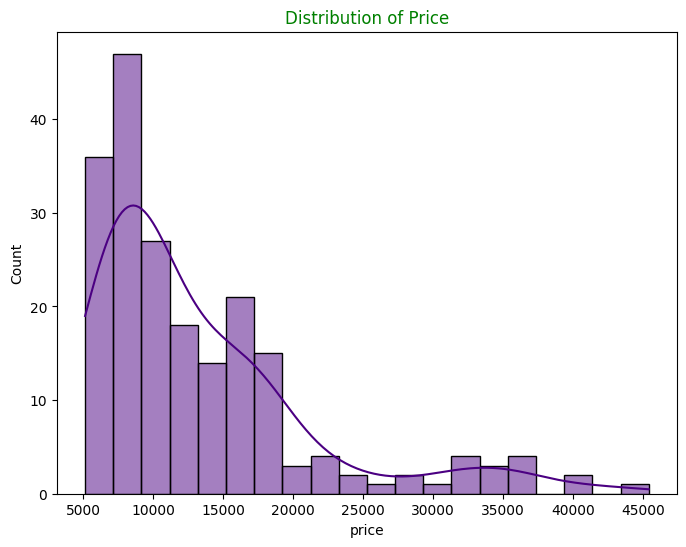

In [177]:
#Price analysis
plt.figure(figsize = (8,6))
sns.histplot(data=df['price'],bins = 20,kde=True,color='indigo')
plt.title('Distribution of Price',color='green')
plt.show()

#### Price distribution is right skewed.

In [178]:
#skewness
price_skewness = df['price'].skew()
price_skewness

1.7776781560914454

#### Most of the data is on the left side, with a few really big values on the right. The average is higher than the middle value, ie mean > median.

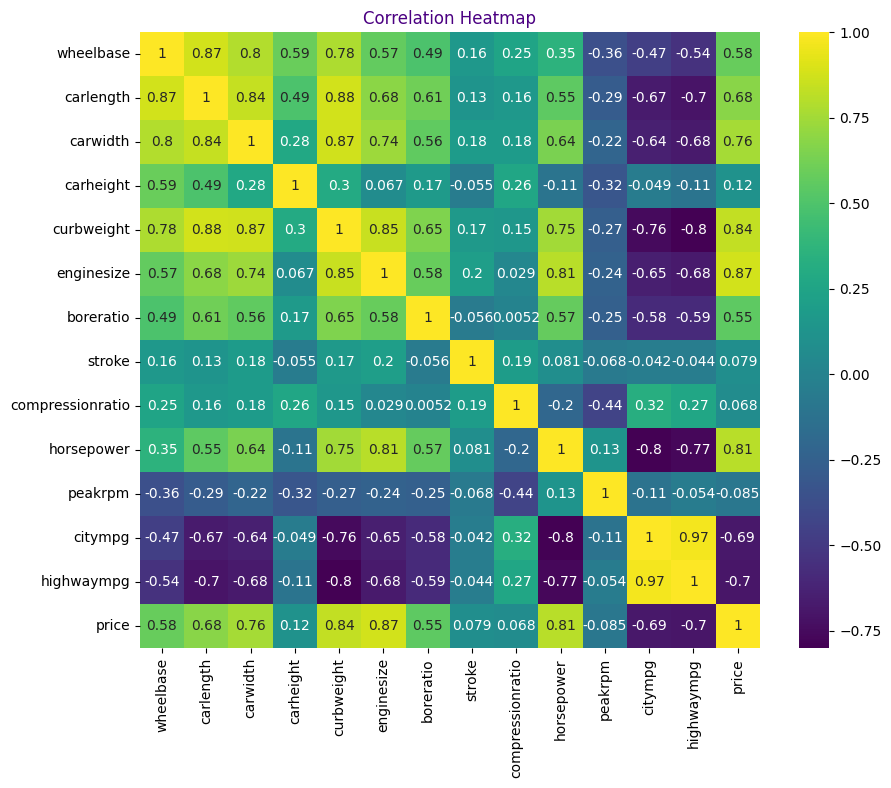

In [179]:
#Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap='viridis')
plt.title('Correlation Heatmap',color = 'indigo')
plt.show()

##### There is a slightly high positive correlation between the price and carwidth,enginsize,horsepower,curbweight and no other variables has a significant impact on car price.

In [180]:
x = categorical_columns
y = df[['price']]
x.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


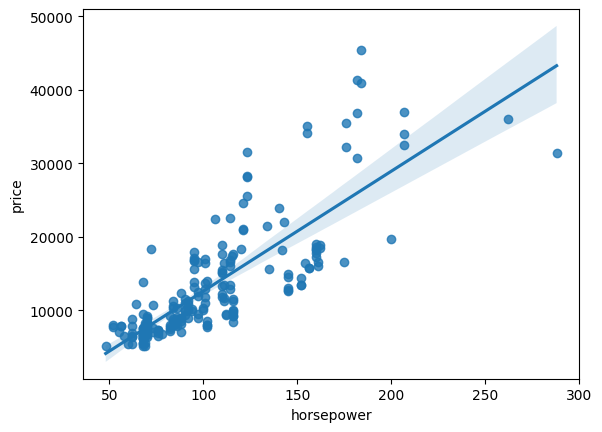

In [181]:
sns.regplot(x = df['horsepower'], y = df['price'])
plt.show()

#### visualizing the relationship between two continuous variables or between a continuous variable and a categorical variable

In [182]:
Categorical_columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']

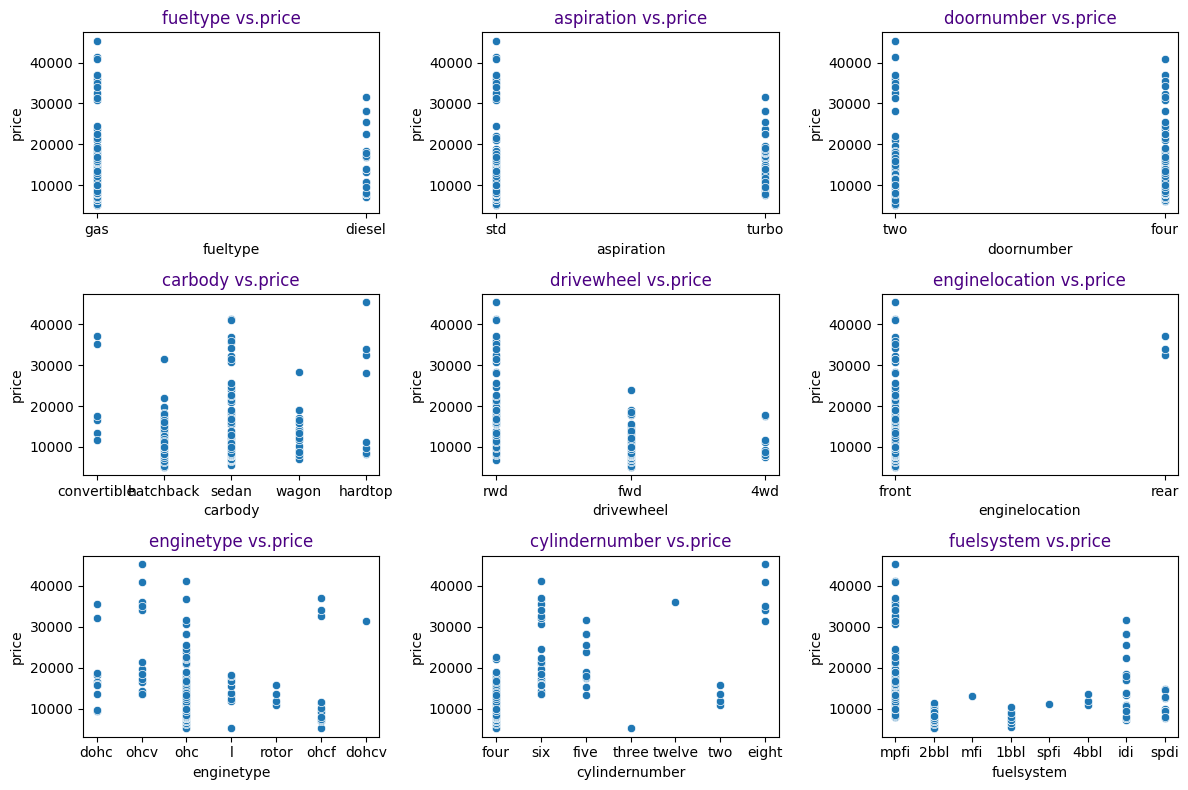

In [183]:
plt.figure(figsize=(12,8))

#converting Index object to a list
categorical_columns_list = list(Categorical_columns)

for feature in categorical_columns_list:
    plt.subplot(3,3,categorical_columns_list.index(feature) + 1)
    sns.scatterplot(data=df, x=feature, y = 'price')
    plt.title(f'{feature} vs.price',color = 'indigo')

plt.tight_layout()
plt.show()

#### comparing the distribution of a continuous variable(price)  across different categories of a categorical variable.

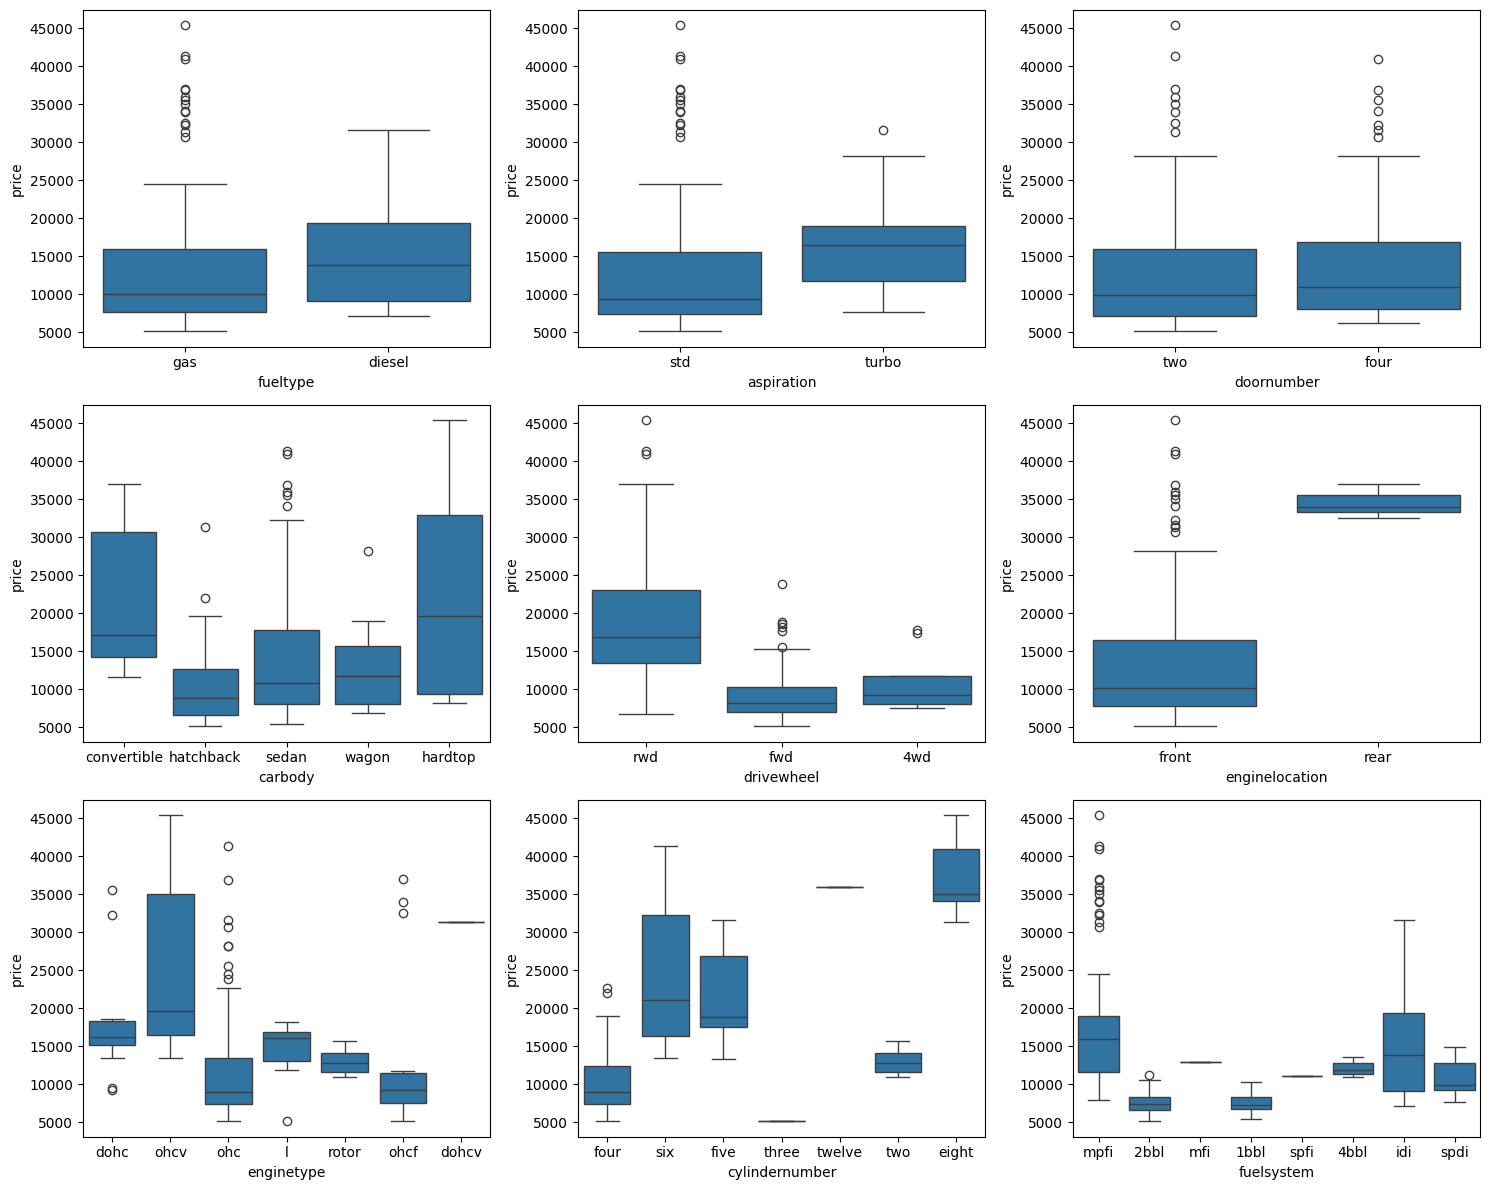

In [184]:
plt.figure(figsize=(15,12))

num_rows = (len(Categorical_columns) + 2) // 3 #comparing the distribution of a continuous variable(price)  across different categories of a categorical variable.
num_cols = min(len(Categorical_columns), 3)  #Set the number of column to 3 or less

for i, feature in enumerate(Categorical_columns):  #We loop through each categorical column (feature) in the categorical_columns list using enumerate() to get both the index and the value.
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df, x=feature, y='price')

plt.tight_layout()
plt.show()    

- Most use car working in gas , and the average price is less than the car working in diesel.
- The most common engine type is "ohc," correlating with lower prices.
- Majority of users opt for [Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.
- Most people prefer the Sedan car type, while higher-priced types like Convertible and Hardtop are also popular choices.

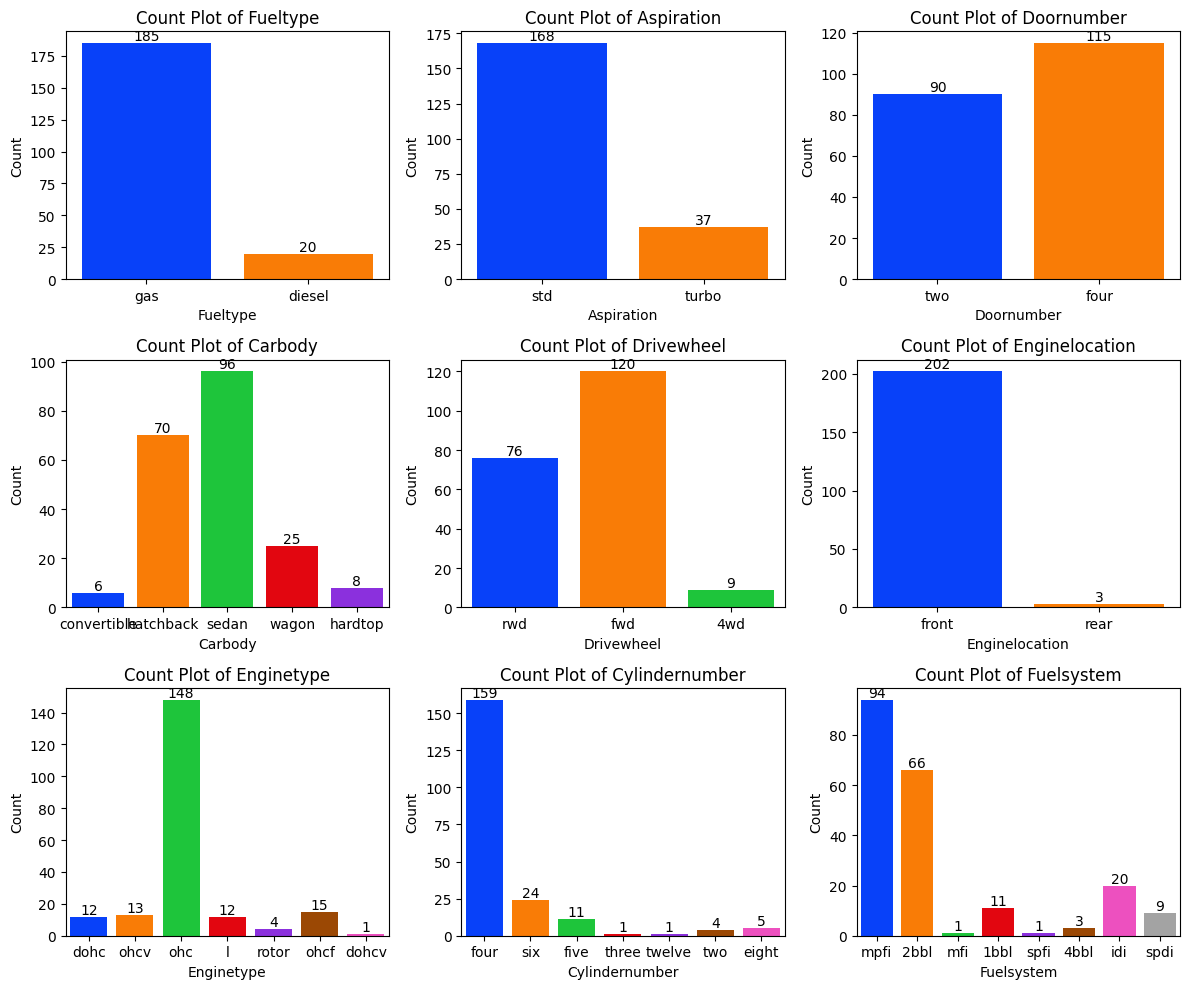

In [185]:
#count plot of each categorical features to Show the counts of observations in each categorical bin using bars.
#list of categorical column to analyze

#create subplots
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
axes=axes.ravel() #generates a one-dimensional array by unraveling the elements in row-major 
## Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(Categorical_columns): #enumerate(categorical_columns): This function pairs each item in the categorical_columns list with its corresponding index. 
                                                 #It returns an iterable where each item is a tuple containing the index and the value from the list.
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95,hue=column)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')


# Adjust layout and show plots
plt.tight_layout()
plt.show()

- Gas cars outnumber diesel cars.
- Four-door cars are preferred by most users.
- Front-wheel drive cars are most commonly used.
- The most popular engine type is OHC.

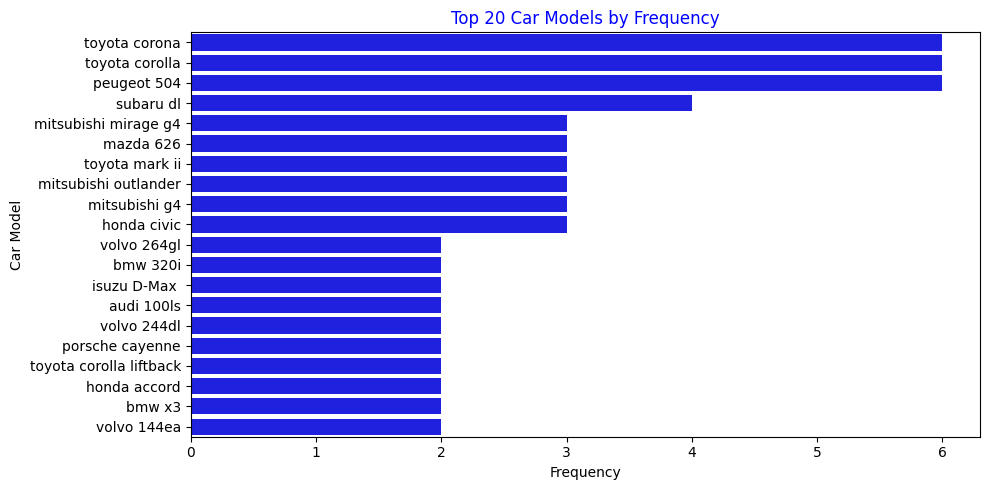

In [186]:
#Top 20 car models in frequency
n=20
top_model_cars=df['CarName'].value_counts().head(n)

#plotting top 5 cars in frequency
plt.figure(figsize=(10, 5))
sns.barplot(x=top_model_cars.values, y=top_model_cars.index,color='blue')
plt.title(f'Top {n} Car Models by Frequency',color='blue')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Toyot corona , toyota corolla , peugeot 504 is in highest position in terms of frequency.

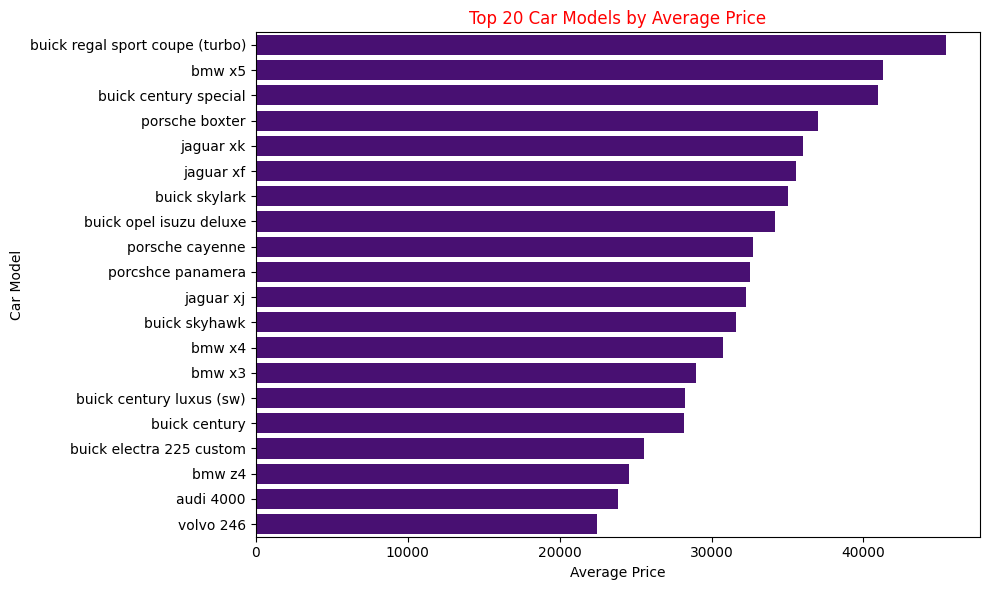

In [187]:

# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,color='indigo')
plt.title(f'Top {n} Car Models by Average Price',color='red')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

- The Buick Regal Sport Coupe has the highest average price, while the Volvo 246 has the lowest.
- More cylinders usually mean a higher price, but most users prefer 4 cylinders.
- Bigger engines generally mean higher prices.
- The car's size - wheelbase, length, and width - affects the price, but height doesn't seem to matter much.

## <span style='color:red'>Data Preprocessing

In [188]:
#Label Encoding : converting categorical to numerical variable
categorical_column=df.select_dtypes(include=['object']).columns
                     
categorical_column
label_encoder = LabelEncoder()
#This line creates an instance of the LabelEncoder class, which will be used to encode categorical variables.

for column in categorical_column:
    df[column]=label_encoder.fit_transform(df[column])
#This loop iterates over each column  in the categorical_colum
#it applies the fit_transform method of the LabelEncoder object to encode the column's values with integer labels.
#The original values in the column are replaced with their encoded integer labels.


In [189]:
df.dtypes

symboling             int64
CarName               int32
CompanyName           int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [190]:
columns=['CarName','CompanyName']
Label_encoder = LabelEncoder()
#This line creates an instance of the LabelEncoder class, which will be used to encode categorical variables.

for column in columns:
    df[column]=Label_encoder.fit_transform(df[column])


In [191]:
df.dtypes

symboling             int64
CarName               int64
CompanyName           int64
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [192]:
# Feature scaling
#Standard Scaling

scaler = StandardScaler()
df[numerical_column] = scaler.fit_transform(df[numerical_column])

## <span style='color:red'> Train the Model

In [193]:
#splitting the data
# x should contain the features used for prediction, and y should contain the target variable
x= df.drop(columns=['price'])  # Features
y = df['price']  # Target variable


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#model fitting
model=LinearRegression()
model.fit(x_train,y_train)

Shape of x_train: (164, 25)
Shape of x_test: (41, 25)
Shape of y_train: (164,)
Shape of y_test: (41,)


LinearRegression()

In [194]:
# Construct the equation
equation = f"price = {intercept:.2f}"
for feature, coefficient in zip(X.columns, coefficients):
    equation += f" + ({coefficient:.2f} * {feature})"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
price = -0.71 + (0.02 * symboling) + (0.00 * CarName) + (-0.04 * CompanyName) + (1.34 * fueltype) + (0.13 * aspiration) + (-0.18 * doornumber) + (-0.14 * carbody) + (0.08 * drivewheel) + (1.46 * enginelocation) + (0.14 * wheelbase) + (-0.07 * carlength) + (0.15 * carwidth) + (0.05 * carheight) + (0.18 * curbweight) + (0.03 * enginetype) + (-0.03 * cylindernumber) + (0.40 * enginesize) + (0.02 * fuelsystem) + (-0.02 * boreratio) + (-0.08 * stroke) + (0.45 * compressionratio) + (0.10 * horsepower) + (0.07 * peakrpm) + (-0.12 * citympg) + (0.06 * highwaympg)


In [205]:
#intercept
intercept=model.intercept_
intercept

-0.7140841700082357

In [195]:
#slope
coefficients=model.coef_
coefficients

array([ 0.02343321,  0.00203539, -0.03589414,  1.34086388,  0.13069657,
       -0.17624326, -0.13857538,  0.07669052,  1.46192729,  0.13569314,
       -0.07364987,  0.15079175,  0.05179691,  0.17848112,  0.03273471,
       -0.02662504,  0.40175975,  0.01619582, -0.02139729, -0.08247236,
        0.45144292,  0.10127747,  0.07018103, -0.11971238,  0.06380924])

In [196]:
y_predicted_train=model.predict(x_train)

In [197]:
y_predicted_test=model.predict(x_test)
y_predicted_test

array([ 1.54780884e+00,  5.97852221e-01, -4.40476291e-01,  2.00533563e-03,
        1.62614270e+00, -8.81911048e-01, -6.40570670e-01, -9.17294341e-01,
       -4.68462378e-01, -8.05229050e-01,  7.47372511e-02, -9.39841667e-01,
        4.01063177e-01, -3.60051520e-01,  3.34299397e+00, -8.81249919e-01,
       -1.65190150e+00,  1.42062116e-01, -4.50906465e-01, -3.87801428e-01,
       -2.67579018e-01,  9.46987197e-01, -7.06783285e-01, -1.23993229e+00,
       -7.10410284e-01,  1.42438534e+00,  4.26033149e-02,  3.17326742e-01,
       -9.94862296e-01,  3.69527745e-01,  1.64128832e+00, -7.74212216e-01,
       -1.10785997e+00,  1.10773419e+00, -6.73776191e-01,  1.65988447e+00,
       -3.88150938e-01, -4.59951474e-01, -7.93749485e-01,  1.69156377e-01,
       -7.27527263e-01])

In [198]:
x_test.iloc[1]

symboling          -0.671472
CarName             8.000000
CompanyName         2.000000
fueltype            1.000000
aspiration          1.000000
doornumber          1.000000
carbody             2.000000
drivewheel          0.000000
enginelocation      0.000000
wheelbase           0.123757
carlength           0.337262
carwidth            0.930947
carheight          -0.707626
curbweight          0.957693
enginetype          3.000000
cylindernumber      1.000000
enginesize          0.098522
fuelsystem          5.000000
boreratio          -0.739338
stroke              0.462183
compressionratio   -0.793101
horsepower          1.416637
peakrpm             0.787855
citympg            -1.412700
highwaympg         -1.273900
Name: 9, dtype: float64

In [199]:
y_test.iloc[1] #Y

0.5750105295347381

In [200]:
y_predicted_test[1] #y_hat

0.5978522208781172

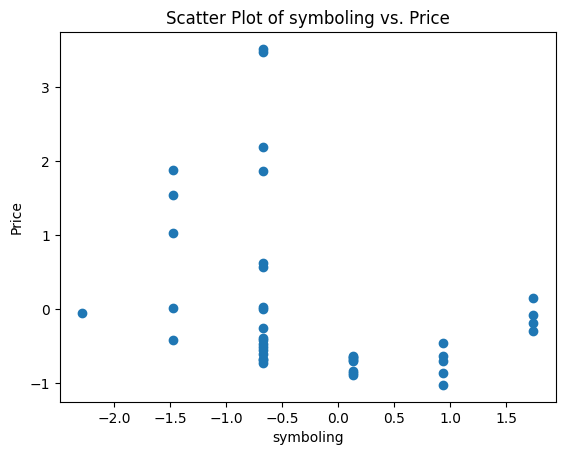

In [206]:
import matplotlib.pyplot as plt

# Choose a single feature to visualize (e.g., the first feature)
feature_to_visualize = X_test.columns[0]

# Plot the chosen feature against the target variable
plt.scatter(X_test[feature_to_visualize], Y_test)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()

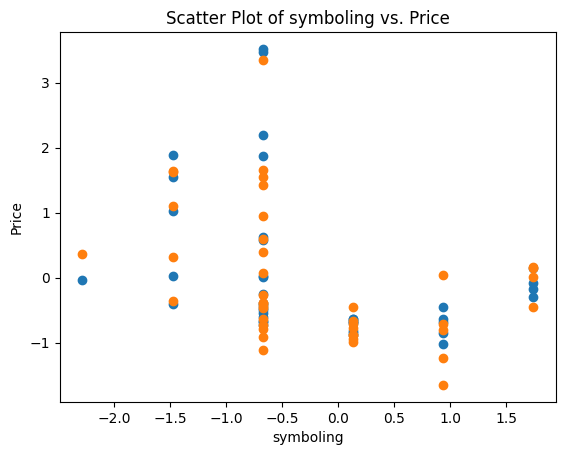

In [207]:
#scatterplot of test data
plt.scatter(X_test[feature_to_visualize], Y_test)

#plot the prediction made by the model
plt.scatter(X_test[feature_to_visualize], Y_predicted_test)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()

In [208]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predicted_test)
r2_square = r2_score(y_test,y_predicted_test)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8450054392046081
Mean Squared Error: 0.19265957897986477


The model is quite good at explaining the data, with about 85% accuracy, and its predictions are usually off by around 0.19 units on average.

In [209]:
mse = mean_squared_error(y_train, y_predicted_train)
r2_square = r2_score(y_train,y_predicted_train)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.9100040363751702
Mean Squared Error: 0.08450838932167794


- R-squared: This model explains around 91% of the variability in the data, which is pretty high. It's doing a great job of capturing the patterns in the data.- 
Mean Squared Error: The average squared difference between the model's predictions and the actual data points is quite low, around 0.08. This means the model's predictions are usually very close to the actual values.

In [210]:
model.score(x_test,y_test) #same as r2_square

0.8450054392046081

In [211]:
#cross_validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train,y_train,cv=5) #cv=5 no of times divided 
scores

array([0.84003626, 0.89673723, 0.84199154, 0.8659234 , 0.86741951])

In [212]:
scores.mean()

0.862421589232827


The performance metrics obtained from all iterations are averaged to obtain a single estimate of the model's performance.